### Loading the Data

In [1]:
file=open('dummytext.txt','rt')
text=file.read()
file.close()
#print(text)

In [2]:
from nltk import sent_tokenize
Sentences=sent_tokenize(text)
print(Sentences[0])

ï»¿One morning, when Gregor Samsa woke from troubled dreams, he found
himself transformed in his bed into a horrible vermin.


In [3]:
Sentences[0]=Sentences[0][3:]
print(Sentences[0])

One morning, when Gregor Samsa woke from troubled dreams, he found
himself transformed in his bed into a horrible vermin.


In [4]:
from nltk import word_tokenize
lines=[]
for sent in Sentences:
    Words=word_tokenize(sent)
    lines.append(Words)  
print(lines[0])

['One', 'morning', ',', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams', ',', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', '.']


### Cleaning the tokenized words

In [5]:
from nltk import SnowballStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
Stemmer=SnowballStemmer('english')
Sentences=[]
for l in lines:
    stemmedW=[]
    for w in l:
        if w not in stop_words and w.isalpha():
            stemmedW.append(Stemmer.stem(w))
    Sentences.append(stemmedW)
print(Sentences[0])    

['one', 'morn', 'gregor', 'samsa', 'woke', 'troubl', 'dream', 'found', 'transform', 'bed', 'horribl', 'vermin']


#### Using gensim to create the word embedding and PCA to visualize

c:\users\dwijraj\appdata\local\programs\python\python36\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
c:\users\dwijraj\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


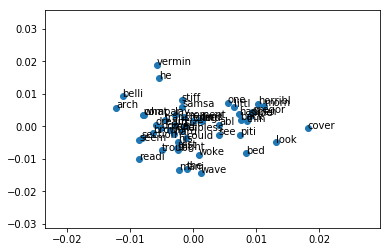

In [6]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
%matplotlib inline
sentences=Sentences[:5]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2D PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

#### Using gensim to form and t-SNE to visualize

c:\users\dwijraj\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


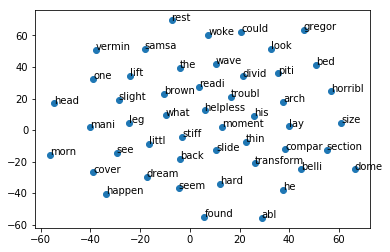

In [7]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import pyplot
%matplotlib inline
sentences=Sentences[:5]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2D t-SNE model to the vectors
X = model[model.wv.vocab]
tsne = TSNE(n_components=2)
result = tsne.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

#### Encoding a Doc using the gensim model created

In [10]:
print(Sentences[0])
print(len(Sentences[0]))
print(model.wv[Sentences[0]])
print(len(model.wv[Sentences[0]]))

['one', 'morn', 'gregor', 'samsa', 'woke', 'troubl', 'dream', 'found', 'transform', 'bed', 'horribl', 'vermin']
12
[[ 0.00262622  0.00391519  0.00462558 ...  0.00380861  0.00307174
   0.0012365 ]
 [-0.00185452  0.00032159  0.00136973 ... -0.00243252  0.00183546
   0.00258527]
 [ 0.00165715  0.00450135  0.00295368 ... -0.00226611 -0.00268931
  -0.00252041]
 ...
 [-0.00419366  0.00438466  0.0044382  ... -0.00284102  0.00380208
   0.00372574]
 [-0.0042703   0.0007453   0.00216426 ...  0.00222689  0.003087
  -0.00468602]
 [-0.00361438  0.00017799 -0.00398705 ... -0.00077405  0.00371705
  -0.00117135]]
12
